# 2) Read the daily confirmed cases and deaths into two dataframes

In [38]:
import pandas as pd

# Read data
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [39]:
confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

In [40]:
confirmed_df.head(4)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  

[4 rows x 1147 columns]

In [41]:
deaths_df.head(4)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896    7896    7896  
1    3598    3598    3598    3598    3598    3598  
2    6881    6881    6881    6881    6881    6881  
3     165     165     165     165     165     165  

[4 rows x 1147 columns]

In [42]:
# Extract relevant columns for summing
confirmed_data = confirmed_df.iloc[:, 4:]
deaths_data = deaths_df.iloc[:, 4:]

In [43]:
confirmed_data.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...   209322  209340  209358  209362  209369  209390   
1        0        0  ...   334391  334408  334408  334427  334427  334427   
2        0        0  ...   271441  271448  271463  271469  271469  271477   
3        0        0  ...    47866   47875   47875   47875   47875   47875   
4        0        0  ...   105255  105277  105277  105277  105277  105277   

   3/6/23  3/7/23  3/8/23  3/9/23  
0  209406  209436  209451  209451  
1  334427  334427  334443  334457  
2  271477  271490  271494  271496  
3   47875   47875   47890   47890  
4  105277  105277  105288  105288  

[5 rows x 1143 columns]

In [44]:
deaths_data.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...     7896    7896    7896    7896    7896    7896   
1        0        0  ...     3598    3598    3598    3598    3598    3598   
2        0        0  ...     6881    6881    6881    6881    6881    6881   
3        0        0  ...      165     165     165     165     165     165   
4        0        0  ...     1933    1933    1933    1933    1933    1933   

   3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896  
1    3598    3598    3598    3598  
2    6881    6881    6881    6881  
3     165     165     165     165  
4    1933    1933    1933    1933  

[5 rows x 1143 columns]

In [45]:
# Convert data to numeric
confirmed_data = confirmed_data.apply(pd.to_numeric, errors='coerce')
deaths_data = deaths_data.apply(pd.to_numeric, errors='coerce')

In [46]:
# Sum the values
global_confirmed = confirmed_data.sum(axis=0)
global_deaths = deaths_data.sum(axis=0)

In [47]:
global_confirmed.head(4)

1/22/20     557
1/23/20     657
1/24/20     944
1/25/20    1437
dtype: int64

In [48]:
global_deaths.head(4)

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
dtype: int64

# 3) Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level (daily total of all the countries).

In [49]:
# Create a DataFrame
global_data = pd.DataFrame({'Confirmed': global_confirmed, 'Deaths': global_deaths})

In [50]:
global_data

Confirmed   Deaths
1/22/20        557       17
1/23/20        657       18
1/24/20        944       26
1/25/20       1437       42
1/26/20       2120       56
...            ...      ...
3/5/23   676024901  6877749
3/6/23   676082941  6878115
3/7/23   676213378  6879038
3/8/23   676392824  6880483
3/9/23   676570149  6881802

[1143 rows x 2 columns]

# 4) For any given date, you should be able to create/generate a data frame of the total confirmed cases and deaths for all the countries in the world (Hint: a dictionary where the date is the key, and the corresponding value is a dataframe).

In [51]:
date_wise_data = {}

dates = confirmed_df.columns[4:]
for date in dates:
    date_data = confirmed_df.groupby('Country/Region')[date].sum()
    date_wise_data[date] = pd.DataFrame({'Confirmed': date_data, 'Deaths': deaths_df.groupby('Country/Region')[date].sum()})


In [52]:
date = input("Enter the date (M/D/YY) to get the data:")
print(f"Total confirmed cases and deaths on {date} for all countries in the world")
date_wise_data[date]

Enter the date (M/D/YY) to get the data: 1/5/23


Total confirmed cases and deaths on 1/5/23 for all countries in the world


Confirmed  Deaths
Country/Region                         
Afghanistan              207748    7850
Albania                  333850    3596
Algeria                  271244    6881
Andorra                   47781     165
Angola                   105095    1930
...                         ...     ...
West Bank and Gaza       703228    5708
Winter Olympics 2022        535       0
Yemen                     11945    2159
Zambia                   335131    4025
Zimbabwe                 259981    5637

[201 rows x 2 columns]

# 5) Extract the total confirmed cases and deaths for Saskatchewan into a dataframe.

In [53]:
saskatchewan_data = confirmed_df[confirmed_df['Province/State'] == 'Saskatchewan'].iloc[:, 4:].sum()
saskatchewan_deaths = deaths_df[deaths_df['Province/State'] == 'Saskatchewan'].iloc[:, 4:].sum()

saskatchewan_df = pd.DataFrame({'Confirmed': saskatchewan_data, 'Deaths': saskatchewan_deaths})


In [54]:
import yfinance as yf

stock_data = yf.download(['^GSPC', '^IXIC'], start='2020-01-22', end='2023-01-01')


[*********************100%%**********************]  2 of 2 completed


# Visualizations and reporting on the effect of COVID-19 on the stock market

C:\Users\saite\AppData\Local\Temp\ipykernel_13616\2761360957.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  global_data.index = pd.to_datetime(global_data.index)


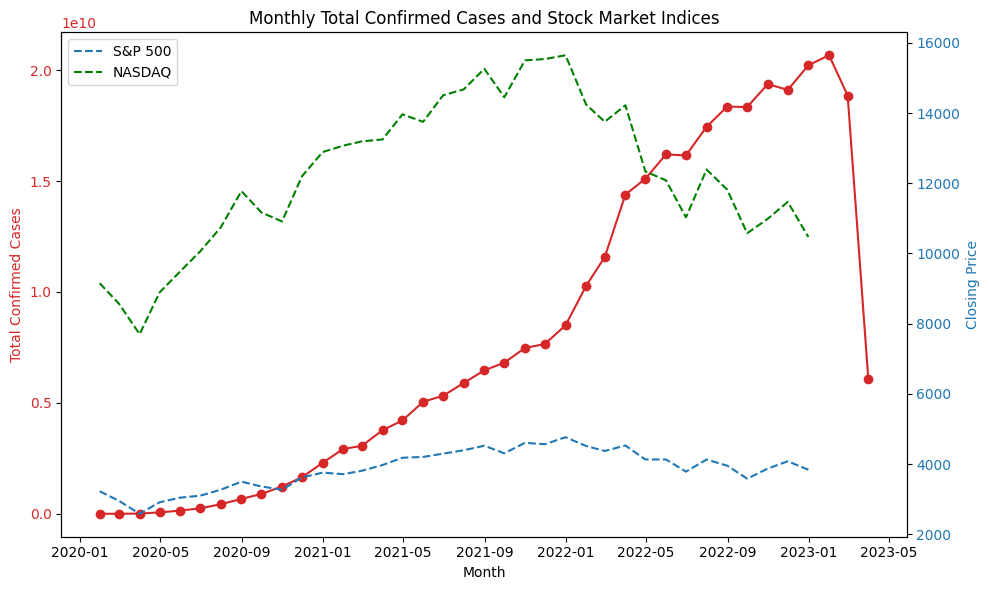

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming global_data and stock_data are available from previous steps

# Convert global_data index to datetime format
global_data.index = pd.to_datetime(global_data.index)

# Resample data to monthly frequency
monthly_confirmed = global_data['Confirmed'].resample('M').sum()

# Extract month from datetime index in stock_data
stock_data['Month'] = stock_data.index.to_period('M')

# Resample stock data to monthly frequency
monthly_stock = stock_data['Close'].resample('M').last()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting total confirmed cases on the first axis
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Confirmed Cases', color=color)
ax1.plot(monthly_confirmed.index, monthly_confirmed.values, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for stock market indices
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Closing Price', color=color)
ax2.plot(monthly_stock.index, monthly_stock['^GSPC'], label='S&P 500', color=color, linestyle='--')
ax2.plot(monthly_stock.index, monthly_stock['^IXIC'], label='NASDAQ', color='green', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Monthly Total Confirmed Cases and Stock Market Indices')
fig.tight_layout()

# Show legend for the second axis
ax2.legend(loc='upper left')

plt.savefig("Monthly Total Confirmed Cases and Stock Market Indices.jpg",dpi=300)
plt.show()


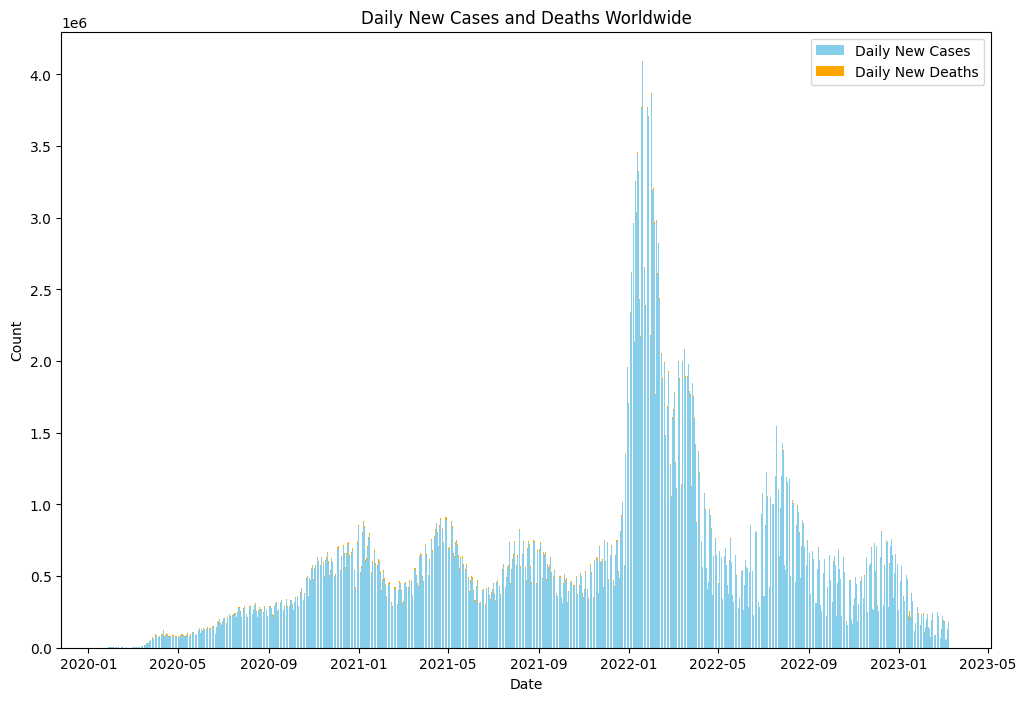

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming global_data is available from previous steps
global_data.index = pd.to_datetime(global_data.index)  # Convert index to datetime format

# Calculate daily new cases and deaths globally
daily_new_cases = global_data['Confirmed'].diff().fillna(0)
daily_new_deaths = global_data['Deaths'].diff().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(global_data.index, daily_new_cases, label='Daily New Cases', color='skyblue')
ax.bar(global_data.index, daily_new_deaths, label='Daily New Deaths', color='orange', bottom=daily_new_cases)
plt.title('Daily New Cases and Deaths Worldwide')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.savefig("Daily New Cases and Deaths Worldwide.jpg",dpi=300)
plt.show()


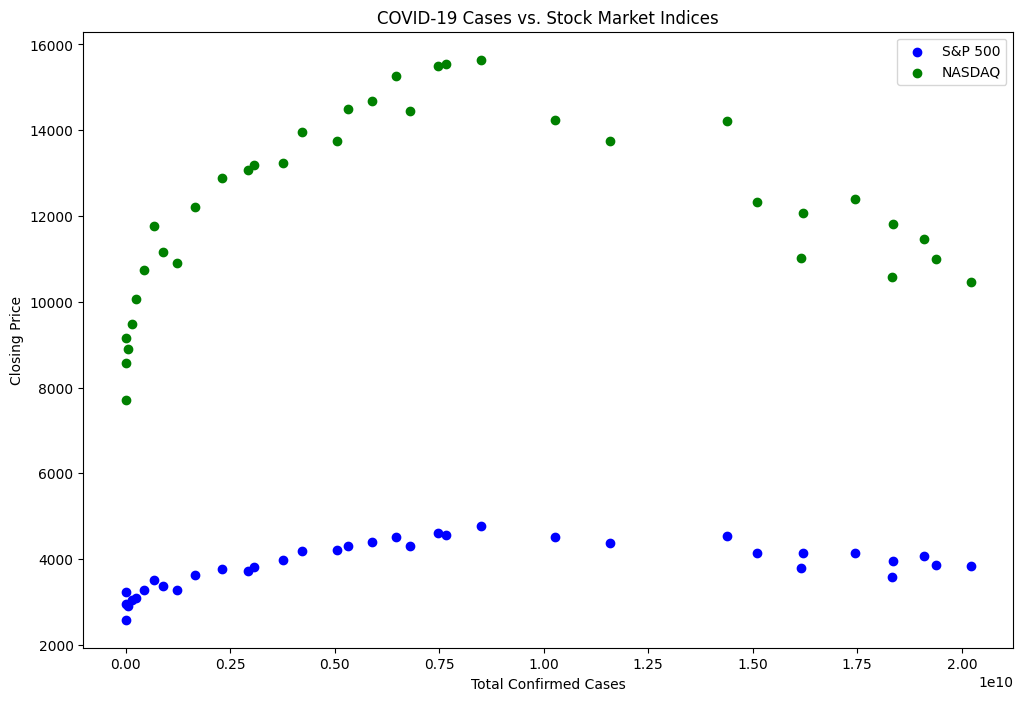

In [57]:
# Assuming global_data and stock_data are available from previous steps

# Merge global_data and stock_data on the common 'Month' column
merged_data = pd.merge(global_data.resample('M').sum(), monthly_stock, left_index=True, right_index=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(merged_data['Confirmed'], merged_data['^GSPC'], label='S&P 500', color='blue')
ax.scatter(merged_data['Confirmed'], merged_data['^IXIC'], label='NASDAQ', color='green')
plt.title('COVID-19 Cases vs. Stock Market Indices')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig("COVID-19 Cases vs. Stock Market Indices.jpg",dpi=300)
plt.show()
